# Project on the Application of the clustering models

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data_stocks = pd.read_csv('data_stocks.csv')
data_stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


### Scatter plot between NASDAQ.AAL vs NASDAQ.AAPL shows they are not similar

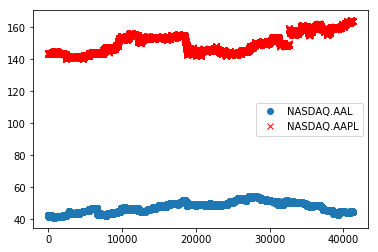

In [9]:
data_stocks[['NASDAQ.AAL','NASDAQ.AAPL']].plot(style=['o','rx'])



### Scatter plot between NASDAQ.AAL vs NASDAQ.ADP shows they are similar

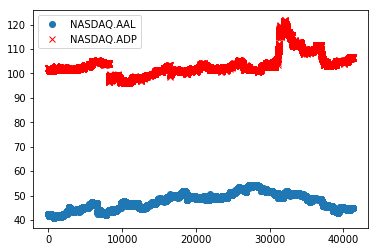

In [10]:
data_stocks[['NASDAQ.AAL','NASDAQ.ADP']].plot(style=['o','rx'])

### Remove unwanted Features namely DATE and SP500

In [11]:
data_stocks.drop(['DATE','SP500'], axis = 1, inplace=True)
data_stocks.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


## Original dataframe is transposed to a new dataframe in order to categorize 500 different stocks into 3 different clusters on the basis of similar data patterns.

In [12]:
data_stocks_transposed = data_stocks.T
data_stocks_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.390,42.330,...,44.72,44.73,44.76,44.75,44.71,44.720,44.73,44.740,44.71,44.74
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.815,143.800,...,164.16,164.06,164.19,164.20,164.14,164.110,164.12,164.010,163.88,163.98
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.100,130.210,...,155.06,155.01,155.12,155.09,155.04,155.090,155.16,155.065,154.96,155.16
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.230,82.165,...,83.71,83.70,83.63,83.69,83.66,83.670,83.65,83.620,83.58,83.69
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.380,102.330,...,106.62,106.56,106.62,106.60,106.63,106.565,106.59,106.520,106.40,106.47


## Build the model

In [13]:
from sklearn.cluster import KMeans 
num_clusters = 3
model = KMeans(n_clusters = num_clusters)
model.fit(data_stocks_transposed.values)
y_kmeans = model.predict(data_stocks_transposed.values)

In [14]:
data_stocks_transposed['Cluster'] = y_kmeans
data_stocks_transposed['Cluster'].value_counts()

0    417
2     78
1      5
Name: Cluster, dtype: int64

### The below three cells indicates which all stocks are moving together and which are different from each other.

In [15]:
data_stocks_transposed.loc[data_stocks_transposed['Cluster']==0].head()

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAL,42.33,42.36,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.39,42.330,...,44.730,44.760,44.750,44.710,44.720,44.73,44.74,44.710,44.74,0
NASDAQ.ADI,82.04,82.08,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.23,82.165,...,83.700,83.630,83.690,83.660,83.670,83.65,83.62,83.580,83.69,0
NASDAQ.ADP,102.23,102.14,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.38,102.330,...,106.560,106.620,106.600,106.630,106.565,106.59,106.52,106.400,106.47,0
NASDAQ.ADSK,85.22,85.65,85.5100,85.4872,85.7001,85.9200,85.912,85.82,85.88,85.860,...,114.510,114.560,114.515,114.450,114.490,114.52,114.47,114.330,114.46,0
NASDAQ.AKAM,59.76,59.84,59.7950,59.6200,59.6200,59.6100,59.540,59.41,59.43,59.260,...,47.115,47.125,47.130,47.145,47.150,47.15,47.15,47.135,47.15,0


In [16]:
data_stocks_transposed.loc[data_stocks_transposed['Cluster']==1].head()

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AMZN,888.55,887.1173,887.5110,886.2700,886.5800,886.8000,887.310,888.5997,889.80,888.8450,...,980.03,980.540,980.540,980.02,979.840,980.0100,979.81,979.4450,980.60,1
NASDAQ.GOOG,829.41,833.1000,835.9184,833.6200,835.3200,835.1400,835.300,835.8000,836.32,836.7050,...,938.70,938.800,938.960,938.75,938.800,938.6700,938.13,937.6800,939.33,1
NASDAQ.GOOGL,847.83,852.1700,854.2800,852.7800,854.7500,853.9700,854.250,854.8250,855.28,855.5775,...,954.17,954.540,954.660,954.54,954.505,954.4700,953.88,953.4650,955.24,1
NASDAQ.ISRG,766.47,766.5400,767.0300,766.5853,766.5853,766.5853,766.610,767.2650,767.98,766.7800,...,1004.43,1004.705,1004.875,1004.24,1004.400,1004.6700,1004.04,1003.3100,1004.67,1
NASDAQ.PCLN,1776.26,1779.4606,1777.5500,1776.4301,1774.0800,1775.0000,1776.585,1777.0100,1776.03,1775.5736,...,1850.46,1850.800,1851.520,1851.85,1851.015,1852.1401,1852.29,1852.2499,1852.08,1


In [17]:
data_stocks_transposed.loc[data_stocks_transposed['Cluster']==2].head()

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster
NASDAQ.AAPL,143.68,143.70,143.6901,143.6400,143.66,143.7800,143.864,143.8100,143.815,143.8000,...,164.06,164.19,164.200,164.140,164.1100,164.12,164.010,163.88,163.98,2
NASDAQ.ADBE,129.63,130.32,130.2250,130.0729,129.88,130.0700,130.180,130.1400,130.100,130.2100,...,155.01,155.12,155.090,155.040,155.0900,155.16,155.065,154.96,155.16,2
NASDAQ.AMGN,164.63,164.68,164.9050,164.7600,164.85,164.9225,164.820,164.7269,164.705,164.7900,...,177.74,177.86,177.860,177.865,177.8512,177.78,177.760,177.63,177.82,2
NASDAQ.AVGO,219.11,219.98,219.3900,219.3000,219.18,219.4900,219.720,219.8700,219.820,219.2701,...,252.05,252.07,252.095,251.790,251.9150,252.12,252.010,251.76,252.07,2
NASDAQ.BIIB,274.08,273.99,274.2750,273.5900,273.54,274.1300,273.870,274.0500,273.870,274.3800,...,315.97,316.05,316.020,316.000,316.2000,316.58,316.320,316.37,316.58,2
